In [186]:
!pip install votekit

# Data Loading

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

elections_df = pd.read_parquet('Dayton_elections.parquet')
pop_df       = pd.read_parquet('Dayton_pop.parquet')
vap_df       = pd.read_parquet('Dayton_vap.parquet')

Precincts data:

In [188]:
precincts_df = gpd.read_parquet("Dayton_precincts.parquet")
geoid_to_name_map = dict(zip(precincts_df['GEOID20'], precincts_df['NAME20']))

Columns for each election with position_year_party format

In [189]:
# Add column mapping VTD to name20 using geoid_to_name_map
elections_df['NAME20'] = elections_df.index.str.replace('vtd:', '').map(geoid_to_name_map)
elections_df.head()

,pres_08_dem,pres_08_rep,pres_12_dem,pres_12_rep,pres_16_dem,pres_16_rep,sen_16_dem,sen_16_rep,sen_18_dem,sen_18_rep,...,ag_22_rep,aud_22_dem,aud_22_rep,sos_22_dem,sos_22_rep,treas_22_dem,treas_22_rep,cong_22_dem,cong_22_rep,NAME20
VTD,,,,,,,,,,,,,,,,,,,,,
vtd:39113057AFC,272,174,237,156,254,117,193,164,170,90,...,82,94,78,87,81,99,70,89,83,DAYTON 12-D
vtd:39113057AFE,475,342,374,206,315,312,244,363,295,184,...,210,211,198,202,200,214,195,183,222,DAYTON 12-C
vtd:39113057AIE,965,66,546,45,821,45,749,101,732,39,...,82,622,53,616,62,625,53,539,113,DAYTON 22-B
vtd:39113057AIF,925,16,968,51,757,19,694,55,554,15,...,28,340,14,335,19,347,11,318,33,DAYTON 22-C
vtd:39113057ADB,506,5,206,0,321,7,285,24,216,5,...,17,131,8,132,9,130,9,118,21,DAYTON 6-B


Population Data

In [190]:
pop_df['NAME20'] = pop_df.index.str.replace('vtd:', '').map(geoid_to_name_map)
pop_df.head()

,tot_pop_20,bpop_20,hpop_20,asian_nhpi_pop_20,amin_pop_20,other_pop_20,white_pop_20,NAME20
id,,,,,,,,
vtd:39113057AFC,1689,459,275,23,57,2,873,DAYTON 12-D
vtd:39113057AFE,2550,561,334,55,69,35,1496,DAYTON 12-C
vtd:39113057AIE,1564,1281,31,11,5,13,223,DAYTON 22-B
vtd:39113057AIF,1559,1420,23,6,9,10,91,DAYTON 22-C
vtd:39113057ADB,590,563,0,1,3,5,18,DAYTON 6-B


VAP (Voting Age Population) Data, ie. number of voting age people

In [191]:
vap_df['NAME20'] = vap_df.index.str.replace('vtd:', '').map(geoid_to_name_map)
vap_df.head()

,tot_vap_20,bvap_20,hvap_20,asian_nhpi_vap_20,amin_vap_20,other_vap_20,white_vap_20,NAME20
id,,,,,,,,
vtd:39113057AFC,1195,255,165,9,49,1,716,DAYTON 12-D
vtd:39113057AFE,1824,300,221,28,51,23,1201,DAYTON 12-C
vtd:39113057AIE,1213,974,23,8,5,11,192,DAYTON 22-B
vtd:39113057AIF,1131,1031,15,3,7,6,69,DAYTON 22-C
vtd:39113057ADB,447,424,0,0,2,3,18,DAYTON 6-B


# Precinct Visualizations

In [192]:
precincts_df.columns

Index(['STATEFP20', 'COUNTYFP20', 'VTDST20', 'GEOID20', 'VTDI20', 'NAME20',
       'NAMELSAD20', 'LSAD20', 'MTFCC20', 'FUNCSTAT20', 'ALAND20', 'AWATER20',
       'INTPTLAT20', 'INTPTLON20', 'geometry'],
      dtype='object')

<Axes: >

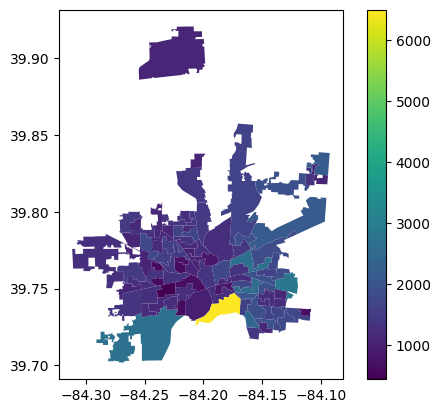

In [172]:
# Merge pop_df columns to precincts_df
total_population_df = precincts_df.merge(pop_df, on='NAME20')
total_population_df.plot(column='tot_pop_20', legend=True)

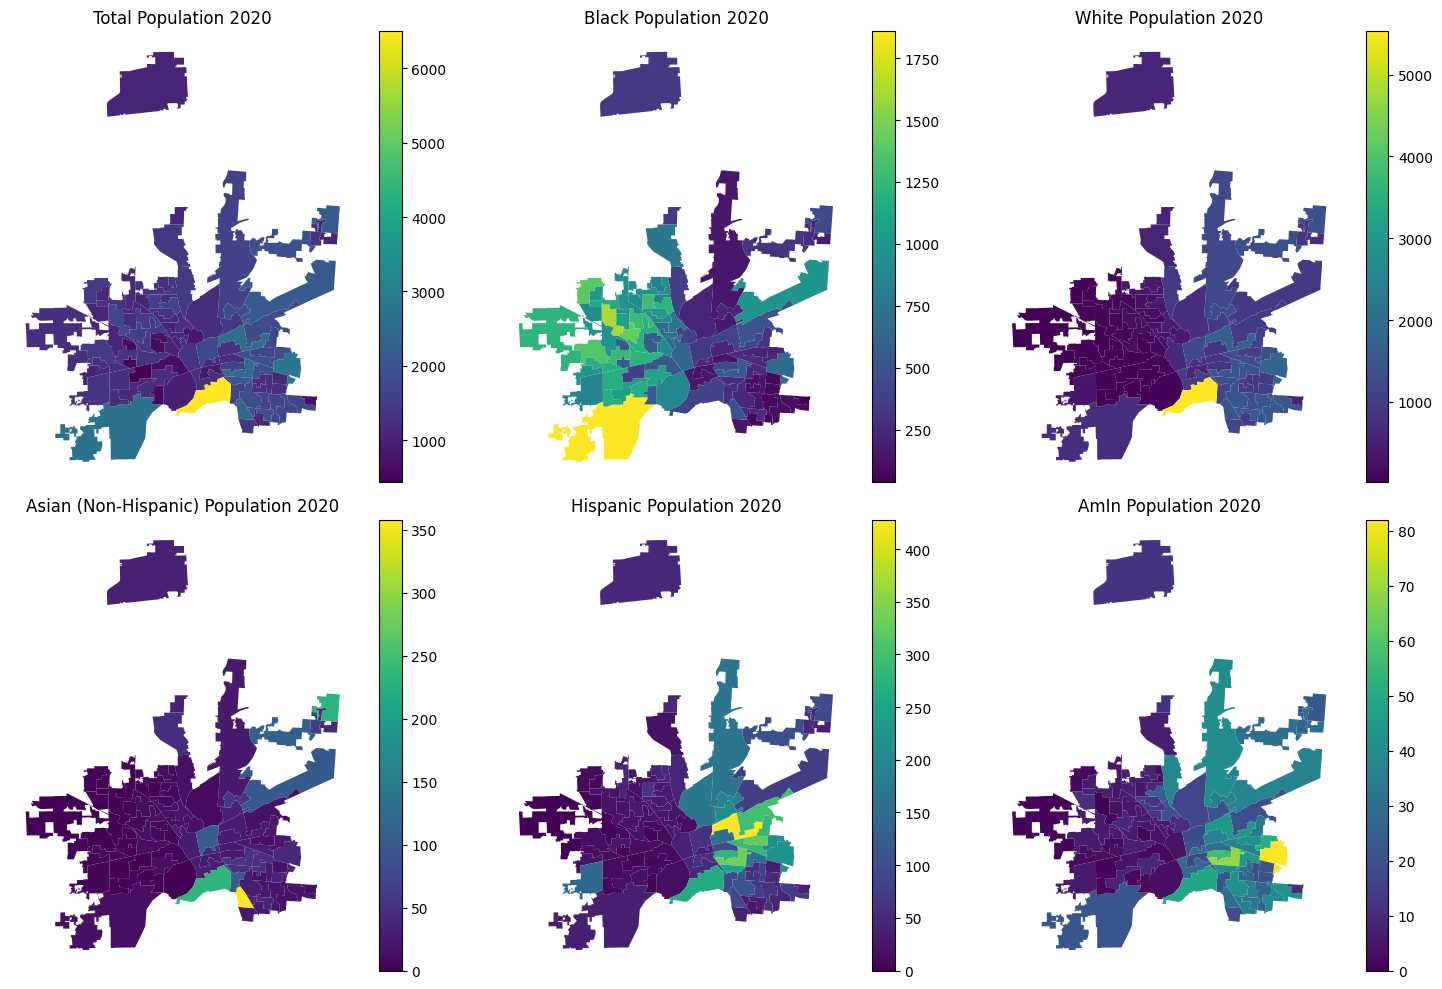

In [173]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10)) # Increased figsize for better layout
axes = axes.flatten() # Flatten the 2x3 array of axes

# List of columns to plot and their titles
plot_cols = ['tot_pop_20', 'bpop_20', 'white_pop_20', 'asian_nhpi_pop_20', 'hpop_20', 'amin_pop_20']
plot_titles = ['Total Population 2020', 'Black Population 2020', 'White Population 2020',
               'Asian (Non-Hispanic) Population 2020', 'Hispanic Population 2020', 'AmIn Population 2020']

# Iterate through the flattened axes and plot
for i, col in enumerate(plot_cols):
    total_population_df.plot(column=col, legend=True, ax=axes[i])
    axes[i].set_title(plot_titles[i])
    axes[i].set_axis_off() # Turn off axes for cleaner map

plt.tight_layout()
plt.show()

## Election Outcomes

In [231]:
# prompt: make new data frame from precincts with new columns for winner margins reported by taking the election for dem votes - rep votes
election_results_df = precincts_df.copy()

dem_election_cols = [col for col in elections_df.columns if '_dem' in col]
for col in dem_election_cols:
  election_name = col.split('_')[0] + '_' + col.split('_')[1]
  rep_col = col.replace('_dem', '_rep')
  total_col = col.replace('_dem', '_total')
  turnout_col = col.replace('_dem', '_turnout')

  # iterate over rows
  totals = []
  turnouts = []
  for index, row in elections_df.iterrows():
    t = row[col] + row[rep_col]
    totals.append(t)
    turnouts.append(t / vap_df.loc[index, 'tot_vap_20'])

  election_results_df[turnout_col] = turnouts
  election_results_df[total_col] = totals

Plugin any of the given elections in the following list:

In [230]:
print(elections_df.columns)

Index(['pres_08_dem', 'pres_08_rep', 'pres_12_dem', 'pres_12_rep',
       'pres_16_dem', 'pres_16_rep', 'sen_16_dem', 'sen_16_rep', 'sen_18_dem',
       'sen_18_rep', 'gov_18_dem', 'gov_18_rep', 'ag_18_dem', 'ag_18_rep',
       'pres_20_dem', 'pres_20_rep', 'sen_22_dem', 'sen_22_rep', 'gov_22_dem',
       'gov_22_rep', 'ag_22_dem', 'ag_22_rep', 'aud_22_dem', 'aud_22_rep',
       'sos_22_dem', 'sos_22_rep', 'treas_22_dem', 'treas_22_rep',
       'cong_22_dem', 'cong_22_rep', 'NAME20'],
      dtype='object')


([], [])

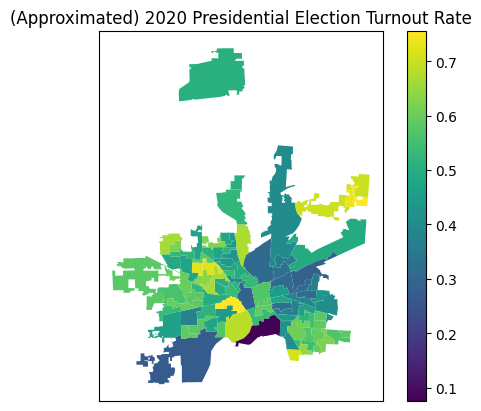

In [235]:
election_results_df.plot(column='pres_20_turnout', legend=True)
plt.title('(Approximated) 2020 Presidential Election Turnout Rate')
plt.xticks([])
plt.yticks([])

# Bubble Plots

## Process Election Settings

In [89]:
import pandas as pd
import numpy as np

full_results = {"defaults": [],
                "turnout": [],
                "cohesion": [],
                "incumbents": [],
                "combination": [],
                "smaller": []}

def process_election_results(toggle):
    results = pd.read_json(f'election_results_{toggle}.jsonl', lines=True)
    # Iterate over the election_results
    for index, row in results.iterrows():
        # Count white winners (element with W in string) and Colored Winners (with C in string)
        full_results[toggle].append(len([c for cand_set in row for c in cand_set if "C" in c]))

for toggle in full_results.keys():
    process_election_results(toggle)

## Bubble Viz

In [55]:
from typing import Optional
import numpy as np
from matplotlib.axes import Axes
import matplotlib.pyplot as plt

def bubble_plot_integer(
    data: list[list[int]],
    colors: list[str],
    ax: Optional[Axes] = None,
    marker: str =".",
    size: int = 1000
):
    # create figure

    if ax is None:
        fig, ax = plt.subplots()

    x_max = int(max(max(vector) for vector in data))
    bin_min = 0
    bin_max = x_max
    bins = np.arange(bin_min-.5, bin_max+1.5, 1)

    for j, vector in enumerate(data):
        x = [i for i in range(x_max+1)] # x=0,...,x_max
        y = [j+1]*len(x) # put each vector at a different height

        bin_heights, _ = np.histogram(vector, bins = bins,density=True)
        circle_areas = [size*bin_heights[i] for i in range(x_max+1)]
        ax.scatter(x, y, s=circle_areas, alpha=1, color = colors[j], label = None, edgecolors='black', marker=marker)

    return ax

## Subsetting the results

In [236]:
subset = ["defaults", "turnout", "cohesion", "incumbents"]
subset_results = {toggle: full_results[toggle] for toggle in subset}

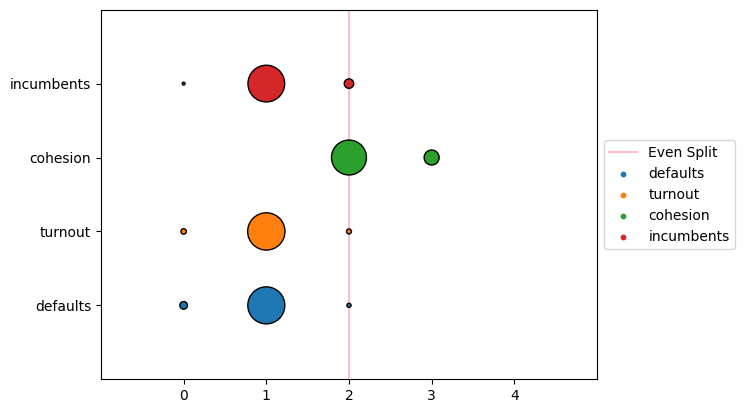

In [240]:
x_max = 5
num_bubbles = len(subset_results.keys())
ax = bubble_plot_integer(
    data = [subset_results[toggle] for toggle in subset_results.keys()],
    colors = ["#1f77b4", "#ff7f0e","#2ca02c", "#d62728"], #, "#9467bd", "#8c564b"],
    size=3000
)

ax.set_xticks([i for i in range(x_max)])
ax.set_yticks([i+1 for i in range(num_bubbles)], subset_results.keys())
ax.axvline(x=2, color="pink", zorder = -1, label="Even Split")
ax.set_xlim((-1, num_bubbles+1))
ax.set_ylim((0.0, num_bubbles+1))


# A trick for adding a legend to the plot
for color, label in zip(
    ["#1f77b4", "#ff7f0e","#2ca02c", "#d62728"],#, "#9467bd", "#8c564b"],
    subset_results.keys()
):
    ax.scatter(
        [], [],                 # no data
        c=color,
        s=10,
        label=label
    )

# finally draw the legend
ax.legend(
    loc="center left",
    scatterpoints=1,
    frameon=True,
    bbox_to_anchor=(1, 0.5),
)

## Smaller and Combination

In [244]:
subset2 = ["defaults", "combination", "smaller"]
subset_results2 = {toggle: full_results[toggle] for toggle in subset2}

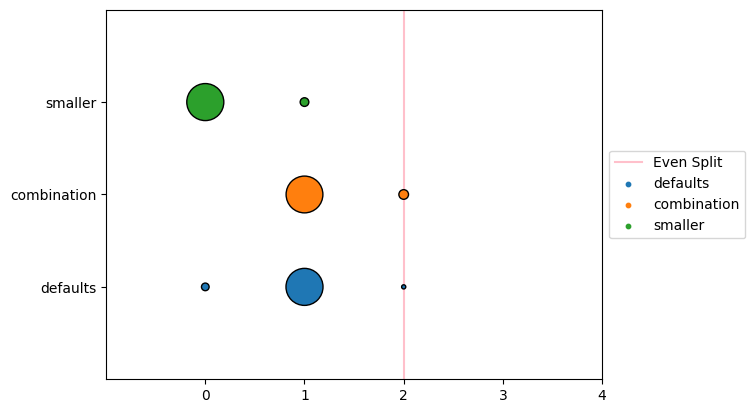

In [245]:
x_max = 5
num_bubbles = len(subset_results2.keys())
ax = bubble_plot_integer(
    data = [subset_results2[toggle] for toggle in subset_results2.keys()],
    colors = ["#1f77b4", "#ff7f0e","#2ca02c"],
    size=3000
)

ax.set_xticks([i for i in range(x_max)])
ax.set_yticks([i+1 for i in range(num_bubbles)], subset_results2.keys())
ax.axvline(x=2, color="pink", zorder = -1, label="Even Split")
ax.set_xlim((-1, num_bubbles+1))
ax.set_ylim((0.0, num_bubbles+1))


# A trick for adding a legend to the plot
for color, label in zip(
    ["#1f77b4", "#ff7f0e","#2ca02c"],
    subset_results2.keys()
):
    ax.scatter(
        [], [],                 # no data
        c=color,
        s=10,
        label=label
    )

# finally draw the legend
ax.legend(
    loc="center left",
    scatterpoints=1,
    frameon=True,
    bbox_to_anchor=(1, 0.5),
)